In [ ]:
import requests
import pandas as pd

# Step 1: Define API Endpoint & Parameters
BLS_API_URL = "https://api.bls.gov/publicAPI/v2/timeseries/data/"
headers = {"Content-Type": "application/json"}

import requests
import pandas as pd

# Step 1: Define API Endpoint & Parameters
BLS_API_URL = "https://api.bls.gov/publicAPI/v2/timeseries/data/"
headers = {"Content-Type": "application/json"}

# Replace with the desired time series ID (e.g., Whole Milk: APU0000701111)
data_payload = {
    "seriesid": ["APU0000701111", 'APU0000701312', 'APU0000701322'],  # Change this for different products
    "startyear": "2015",  # Adjust year range as needed
    "endyear": "2025"
}

# Step 2: Make API Request
response = requests.post(BLS_API_URL, json=data_payload, headers=headers)
data = response.json()

# Step 3: Extract & Convert Data to DataFrame
if "Results" in data:
    series_data = data["Results"]["series"][0]["data"]
    df = pd.DataFrame(series_data)
    df["year_month"] = df["year"] + "-" + df["period"].str[1:]  # Format Year-Month
    df = df[["year_month", "value"]]  # Select relevant columns
    df = df.sort_values("year_month", ascending=True)  # Sort by time

    # Display Data
    print(df.head())
import requests
import pandas as pd

# Step 1: Define API Endpoint & Parameters
BLS_API_URL = "https://api.bls.gov/publicAPI/v2/timeseries/data/"
headers = {"Content-Type": "application/json"}

# Replace with the desired time series ID (e.g., Whole Milk: APU0000701111)
data_payload = {
    "seriesid": ["APU0000701111", 'APU0000701312', 'APU0000701322'],  # Change this for different products
    "startyear": "2015",  # Adjust year range as needed
    "endyear": "2025"
}

# Step 2: Make API Request
response = requests.post(BLS_API_URL, json=data_payload, headers=headers)
data = response.json()

# Step 3: Extract & Convert Data to DataFrame
if "Results" in data:
    series_data = data["Results"]["series"][0]["data"]
    df = pd.DataFrame(series_data)
    df["year_month"] = df["year"] + "-" + df["period"].str[1:]  # Format Year-Month
    df = df[["year_month", "value"]]  # Select relevant columns
    df = df.sort_values("year_month", ascending=True)  # Sort by time

    # Display Data
    print(df.head())
else:
    print("Error fetching data:", data)
response = requests.post(BLS_API_URL, json=data_payload, headers=headers)
data = response.json()

# Step 3: Extract & Convert Data to DataFrame
if "Results" in data:
    series_data = data["Results"]["series"][0]["data"]
    df = pd.DataFrame(series_data)
    df["year_month"] = df["year"] + "-" + df["period"].str[1:]  # Format Year-Month
    df = df[["year_month", "value"]]  # Select relevant columns
    df = df.sort_values("year_month", ascending=True)  # Sort by time

    # Display Data
df.head()


    year_month  value
118    2015-01  0.545
117    2015-02  0.525
116    2015-03  0.518
115    2015-04  0.509
114    2015-05  0.520
    year_month  value
118    2015-01  0.545
117    2015-02  0.525
116    2015-03  0.518
115    2015-04  0.509
114    2015-05  0.520


,year_month,value
118,2015-01,0.545
117,2015-02,0.525
116,2015-03,0.518
115,2015-04,0.509
114,2015-05,0.520


In [ ]:
import pandas as pd

data_payload = {
    "seriesid": ["APU0000701111", 'APU0000701312', 'APU0000701322'],  # Change this for different products
    "startyear": "2015",  # Adjust year range as needed
    "endyear": "2025"
}

# Create a DataFrame with a single column named 'seriesid'
df_api_keys = pd.DataFrame(data_payload['seriesid'], columns=['seriesid'])

# Display the DataFrame
df_api_keys.head()

,seriesid
0,APU0000701111
1,APU0000701312
2,APU0000701322


In [ ]:
import requests
import pandas as pd

# Step 1: Define API Endpoint & Parameters
BLS_API_URL = "https://api.bls.gov/publicAPI/v2/timeseries/data/"
headers = {"Content-Type": "application/json"}

# Replace with the desired time series ID (e.g., Whole Milk: APU0000701111)
data_payload = {
    "seriesid": ["APU0000701111", 'APU0000701312', 'APU0000701322'],  # Change this for different products
    "startyear": "2015",  # Adjust year range as needed
    "endyear": "2025"
}

# Step 2: Make API Request
response = requests.post(BLS_API_URL, json=data_payload, headers=headers)
data = response.json()

# Step 3: Extract & Convert Data to DataFrame
all_data = []  # Initialize an empty list to store data for all series

if "Results" in data:
    for series in data["Results"]["series"]:  # Iterate through each series in the response
        series_id = series["seriesID"]
        for item in series["data"]:
            all_data.append({
                "seriesid": series_id,
                "year_month": item["year"] + "-" + item["period"][1:],  # Change to item["period"][1:]
                "value": item["value"]
            })

df_combined = pd.DataFrame(all_data)  # Create a DataFrame from the combined data
df_combined.head(20)  # Display the first few rows of the DataFrame


,seriesid,year_month,value
0,APU0000701111,2024-12,0.548
1,APU0000701111,2024-11,0.552
2,APU0000701111,2024-10,0.566
3,APU0000701111,2024-09,0.573
4,APU0000701111,2024-08,0.574
5,APU0000701111,2024-07,0.574
6,APU0000701111,2024-06,0.575
7,APU0000701111,2024-05,0.570
8,APU0000701111,2024-04,0.574
9,APU0000701111,2024-03,0.565


In [ ]:
  #KEEP
    "APU0000701111": "Flour, white, all purpose, per lb. (453.6 gm)",
    "APU0000701312": "Rice, white, long grain, uncooked, per lb. (453.6 gm)",
    "APU0000701322": "Spaghetti and macaroni, per lb. (453.6 gm)",
    "APU0000702111": "Bread, white, pan, per lb. (453.6 gm)",
    "APU0000702212": "Bread, whole wheat, pan, per lb. (453.6 gm)",
    "APU0000702421": "Cookies, chocolate chip, per lb. (453.6 gm)",
    "APU0000703111": "Ground chuck, 100% beef, per lb. (453.6 gm)",
    "APU0000703112": "Ground beef, 100% beef, per lb. (453.6 gm)",
    "APU0000703113": "Ground beef, lean and extra lean, per lb. (453.6 gm)",
    "APU0000703213": "Chuck roast, USDA Choice, boneless, per lb. (453.6 gm)",
    "APU0000703311": "Round roast, USDA Choice, boneless, per lb. (453.6 gm)",
    "APU0000FC2101": "All Uncooked Beef Roasts, per lb. (453.6 gm)",
    "APU0000703511": "Steak, round, USDA Choice, boneless, per lb. (453.6 gm)",
    "APU0000703613": "Steak, sirloin, graded and ungraded, excluding USDA Prime and Choice, per lb. (453.6 gm)",
    "APU0000703432": "Beef for stew, boneless, per lb. (453.6 gm)",
    "APU0000FC3101": "All Uncooked Beef Steaks, per lb. (453.6 gm)",
    "APU0000FC4101": "All Uncooked Other Beef (Excluding Veal), per lb. (453.6 gm)",
    "APU0000704111": "Bacon, sliced, per lb. (453.6 gm)",
    "APU0000704211": "Chops, center cut, bone-in, per lb. (453.6 gm)",
    "APU0000704212": "Chops, boneless, per lb. (453.6 gm)",
    "APU0000FD3101": "All Pork Chops, per lb. (453.6 gm)",
    "APU0000704312": "Ham, boneless, excluding canned, per lb. (453.6 gm)",
    "APU0000FD2101": "All Ham (Excluding Canned Ham and Luncheon Slices), per lb. (453.6 gm)",
    "APU0000FD4101": "All Other Pork (Excluding Canned Ham and Luncheon Slices), per lb. (453.6 gm)",
    "APU0000706111": "Chicken, fresh, whole, per lb. (453.6 gm)",
    "APU0000FF1101": "Chicken breast, boneless, per lb. (453.6 gm)",
    "APU0000708111": "Eggs, grade A, large, per doz.",
    "APU0000709112": "Milk, fresh, whole, fortified, per gal. (3.8 lit)",
    "APU0000710211": "American processed cheese, per lb. (453.6 gm)",
    "APU0000710212": "Cheddar cheese, natural, per lb. (453.6 gm)",
    "APU0000710411": "Ice cream, prepackaged, bulk, regular, per 1/2 gal. (1.9 lit)",
    "APU0000711211": "Bananas, per lb. (453.6 gm)",
    "APU0000711311": "Oranges, Navel, per lb. (453.6 gm)",
    "APU0000711411": "Grapefruit, per lb. (453.6 gm)",
    "APU0000711412": "Lemons, per lb. (453.6 gm)",
    "APU0000711415": "Strawberries, dry pint, per 12 oz. (340.2 gm)",
    "APU0000712112": "Potatoes, white, per lb. (453.6 gm)",
    "APU0000712211": "Lettuce, iceberg, per lb. (453.6 gm)",
    "APU0000FL2101": "Lettuce, romaine, per lb. (453.6 gm)",
    "APU0000712311": "Tomatoes, field grown, per lb. (453.6 gm)",
    "APU0000713111": "Orange juice, frozen concentrate, 12 oz. can, per 16 oz. (473.2 ml)",
    "APU0000714233": "Beans, dried, any type, all sizes, per lb. (453.6 gm)",
    "APU0000715211": "Sugar, white, all sizes, per lb. (453.6 gm)",
    "APU0000717311": "Coffee, 100%, ground roast, all sizes, per lb. (453.6 gm)",
    "APU0000718311": "Potato chips, per 16 oz.",
    "APU0000720111": "Malt beverages, all types, all sizes, any origin, per 16 oz. (473.2 ml)",
    "APU0000720311": "Wine, red and white table, all sizes, any origin, per 1 liter (33.8 oz)",

SyntaxError: illegal target for annotation (<ipython-input-5-bc274a952e70>, line 1)

In [ ]:
  #KEEP
    "seriesid": ["APU0000701111", 'APU0000701312', 'APU0000701322', 'APU0000702111','APU0000702212','APU0000702421', 'APU0000703111', 'APU0000703112', 'APU0000703113','APU0000703213','APU0000703311','APU0000FC2101','APU0000703511','APU0000703613','APU0000FC3101','APU0000703432','APU0000FC4101','APU0000704111','APU0000704211','APU0000704212','APU0000FD3101','APU0000704312','APU0000FD2101','APU0000FD4101','APU0000706111','APU0000FF1101','APU0000FF1101','APU0000708111','APU0000709112','APU0000710211','APU0000710212','APU0000710411','APU0000711211','APU0000711311','APU0000711411','APU0000711412','APU0000711415','APU0000712112','APU0000712211','APU0000FL2101','APU0000712311','APU0000713111','APU0000714233','APU0000715211','APU0000717311','APU0000718311','APU0000720111','APU0000720311'],  # Change this for different products

dont delete these yet*** just want to make sure they're saved somewhere

In [ ]:
#I THINK THIS WAS THE KEY CODE THAT HELPED US GET THE WHOLE DF

import requests
import pandas as pd

# Step 1: Define API Endpoint & Parameters
BLS_API_URL = "https://api.bls.gov/publicAPI/v2/timeseries/data/"
headers = {"Content-Type": "application/json"}

data_payload = {
    "seriesid": ["APU0000701111", 'APU0000701312', 'APU0000701322', 'APU0000702111','APU0000702212','APU0000702421', 'APU0000703111', 'APU0000703112', 'APU0000703113','APU0000703213','APU0000703311','APU0000FC2101','APU0000703511','APU0000703613','APU0000FC3101','APU0000703432','APU0000FC4101','APU0000704111','APU0000704211','APU0000704212','APU0000FD3101','APU0000704312','APU0000FD2101','APU0000FD4101','APU0000706111','APU0000FF1101','APU0000708111','APU0000709112','APU0000710211','APU0000710212','APU0000710411','APU0000711211','APU0000711311','APU0000711411','APU0000711412','APU0000711415','APU0000712112','APU0000712211','APU0000FL2101','APU0000712311','APU0000713111','APU0000714233','APU0000715211','APU0000717311','APU0000718311','APU0000720111','APU0000720311'],
    "startyear": "2015",
    "endyear": "2025"
}

item_names = {
    "APU0000701111": "Flour, white, all purpose, per lb. (453.6 gm)",
    "APU0000701312": "Rice, white, long grain, uncooked, per lb. (453.6 gm)",
    "APU0000701322": "Spaghetti and macaroni, per lb. (453.6 gm)",
    "APU0000702111": "Bread, white, pan, per lb. (453.6 gm)",
    "APU0000702212": "Bread, whole wheat, pan, per lb. (453.6 gm)",
    "APU0000702421": "Cookies, chocolate chip, per lb. (453.6 gm)",
    "APU0000703111": "Ground chuck, 100% beef, per lb. (453.6 gm)",
    "APU0000703112": "Ground beef, 100% beef, per lb. (453.6 gm)",
    "APU0000703113": "Ground beef, lean and extra lean, per lb. (453.6 gm)",
    "APU0000703213": "Chuck roast, USDA Choice, boneless, per lb. (453.6 gm)",
    "APU0000703311": "Round roast, USDA Choice, boneless, per lb. (453.6 gm)",
    "APU0000FC2101": "All Uncooked Beef Roasts, per lb. (453.6 gm)",
    "APU0000703511": "Steak, round, USDA Choice, boneless, per lb. (453.6 gm)",
    "APU0000703613": "Steak, sirloin, graded and ungraded, excluding USDA Prime and Choice, per lb. (453.6 gm)",
    "APU0000703432": "Beef for stew, boneless, per lb. (453.6 gm)",
    "APU0000FC3101": "All Uncooked Beef Steaks, per lb. (453.6 gm)",
    "APU0000FC4101": "All Uncooked Other Beef (Excluding Veal), per lb. (453.6 gm)",
    "APU0000704111": "Bacon, sliced, per lb. (453.6 gm)",
    "APU0000704211": "Chops, center cut, bone-in, per lb. (453.6 gm)",
    "APU0000704212": "Chops, boneless, per lb. (453.6 gm)",
    "APU0000FD3101": "All Pork Chops, per lb. (453.6 gm)",
    "APU0000704312": "Ham, boneless, excluding canned, per lb. (453.6 gm)",
    "APU0000FD2101": "All Ham (Excluding Canned Ham and Luncheon Slices), per lb. (453.6 gm)",
    "APU0000FD4101": "All Other Pork (Excluding Canned Ham and Luncheon Slices), per lb. (453.6 gm)",
    "APU0000706111": "Chicken, fresh, whole, per lb. (453.6 gm)",
    "APU0000FF1101": "Chicken breast, boneless, per lb. (453.6 gm)",
    "APU0000708111": "Eggs, grade A, large, per doz.",
    "APU0000709112": "Milk, fresh, whole, fortified, per gal. (3.8 lit)",
    "APU0000710211": "American processed cheese, per lb. (453.6 gm)",
    "APU0000710212": "Cheddar cheese, natural, per lb. (453.6 gm)",
    "APU0000710411": "Ice cream, prepackaged, bulk, regular, per 1/2 gal. (1.9 lit)",
    "APU0000711211": "Bananas, per lb. (453.6 gm)",
    "APU0000711311": "Oranges, Navel, per lb. (453.6 gm)",
    "APU0000711411": "Grapefruit, per lb. (453.6 gm)",
    "APU0000711412": "Lemons, per lb. (453.6 gm)",
    "APU0000711415": "Strawberries, dry pint, per 12 oz. (340.2 gm)",
    "APU0000712112": "Potatoes, white, per lb. (453.6 gm)",
    "APU0000712211": "Lettuce, iceberg, per lb. (453.6 gm)",
    "APU0000FL2101": "Lettuce, romaine, per lb. (453.6 gm)",
    "APU0000712311": "Tomatoes, field grown, per lb. (453.6 gm)",
    "APU0000713111": "Orange juice, frozen concentrate, 12 oz. can, per 16 oz. (473.2 ml)",
    "APU0000714233": "Beans, dried, any type, all sizes, per lb. (453.6 gm)",
    "APU0000715211": "Sugar, white, all sizes, per lb. (453.6 gm)",
    "APU0000717311": "Coffee, 100%, ground roast, all sizes, per lb. (453.6 gm)",
    "APU0000718311": "Potato chips, per 16 oz.",
    "APU0000720111": "Malt beverages, all types, all sizes, any origin, per 16 oz. (473.2 ml)",
    "APU0000720311": "Wine, red and white table, all sizes, any origin, per 1 liter (33.8 oz)",
}

# Replace with the desired time series ID (e.g., Whole Milk: APU0000701111)
all_series_ids = list(item_names.keys())

# Step 2: Make API Request
response = requests.post(BLS_API_URL, json=data_payload, headers=headers)
data = response.json()

# Step 3: Extract & Convert Data to DataFrame
all_data = []

if "Results" in data:
    for series in data["Results"]["series"]:
        series_id = series["seriesID"]
        for item in series["data"]:
            all_data.append({
                "seriesid": series_id,
                "item_name": item_names.get(series_id, "Unknown Item"),
                "year_month": item["year"] + "-" + item["period"][1:],
                "value": item["value"]
            })

df_combined = pd.DataFrame(all_data)
df_combined.tail()

df_combined.to_csv('df_combined.csv', index=False)

In [ ]:
df_combined.tail()

,seriesid,item_name,year_month,value
2972,APU0000706111,"Chicken, fresh, whole",2015-05,1.483
2973,APU0000706111,"Chicken, fresh, whole",2015-04,1.539
2974,APU0000706111,"Chicken, fresh, whole",2015-03,1.545
2975,APU0000706111,"Chicken, fresh, whole",2015-02,1.550
2976,APU0000706111,"Chicken, fresh, whole",2015-01,1.546


In [ ]:
#KEEP
import requests
import pandas as pd

# Step 1: Define API Endpoint & Parameters
BLS_API_URL = "https://api.bls.gov/publicAPI/v2/timeseries/data/"
headers = {"Content-Type": "application/json"}

# Replace with the desired time series ID (e.g., Whole Milk: APU0000701111)
data_payload = {
    "seriesid": ["APU0000701111", 'APU0000701312', 'APU0000701322', 'APU0000702111','APU0000702212','APU0000702421', 'APU0000703111', 'APU0000703112', 'APU0000703113','APU0000703213','APU0000703311','APU0000FC2101','APU0000703511','APU0000703613','APU0000FC3101','APU0000703432','APU0000FC4101','APU0000704111','APU0000704211','APU0000704212','APU0000FD3101','APU0000704312','APU0000FD2101','APU0000FD4101','APU0000706111','APU0000FF1101','APU0000708111','APU0000709112','APU0000710211','APU0000710212','APU0000710411','APU0000711211','APU0000711311','APU0000711411','APU0000711412','APU0000711415','APU0000712112','APU0000712211','APU0000FL2101','APU0000712311','APU0000713111','APU0000714233','APU0000715211','APU0000717311','APU0000718311','APU0000720111','APU0000720311'],
    "startyear": "2015",
    "endyear": "2025"
}

item_names = {
    "APU0000701111": "Flour, white, all purpose, per lb. (453.6 gm)",
    "APU0000701312": "Rice, white, long grain, uncooked, per lb. (453.6 gm)",
    "APU0000701322": "Spaghetti and macaroni, per lb. (453.6 gm)",
    "APU0000702111": "Bread, white, pan, per lb. (453.6 gm)",
    "APU0000702212": "Bread, whole wheat, pan, per lb. (453.6 gm)",
    "APU0000702421": "Cookies, chocolate chip, per lb. (453.6 gm)",
    "APU0000703111": "Ground chuck, 100% beef, per lb. (453.6 gm)",
    "APU0000703112": "Ground beef, 100% beef, per lb. (453.6 gm)",
    "APU0000703113": "Ground beef, lean and extra lean, per lb. (453.6 gm)",
    "APU0000703213": "Chuck roast, USDA Choice, boneless, per lb. (453.6 gm)",
    "APU0000703311": "Round roast, USDA Choice, boneless, per lb. (453.6 gm)",
    "APU0000FC2101": "All Uncooked Beef Roasts, per lb. (453.6 gm)",
    "APU0000703511": "Steak, round, USDA Choice, boneless, per lb. (453.6 gm)",
    "APU0000703613": "Steak, sirloin, graded and ungraded, excluding USDA Prime and Choice, per lb. (453.6 gm)",
    "APU0000703432": "Beef for stew, boneless, per lb. (453.6 gm)",
    "APU0000FC3101": "All Uncooked Beef Steaks, per lb. (453.6 gm)",
    "APU0000FC4101": "All Uncooked Other Beef (Excluding Veal), per lb. (453.6 gm)",
    "APU0000704111": "Bacon, sliced, per lb. (453.6 gm)",
    "APU0000704211": "Chops, center cut, bone-in, per lb. (453.6 gm)",
    "APU0000704212": "Chops, boneless, per lb. (453.6 gm)",
    "APU0000FD3101": "All Pork Chops, per lb. (453.6 gm)",
    "APU0000704312": "Ham, boneless, excluding canned, per lb. (453.6 gm)",
    "APU0000FD2101": "All Ham (Excluding Canned Ham and Luncheon Slices), per lb. (453.6 gm)",
    "APU0000FD4101": "All Other Pork (Excluding Canned Ham and Luncheon Slices), per lb. (453.6 gm)",
    "APU0000706111": "Chicken, fresh, whole, per lb. (453.6 gm)",
    "APU0000FF1101": "Chicken breast, boneless, per lb. (453.6 gm)",
    "APU0000708111": "Eggs, grade A, large, per doz.",
    "APU0000709112": "Milk, fresh, whole, fortified, per gal. (3.8 lit)",
    "APU0000710211": "American processed cheese, per lb. (453.6 gm)",
    "APU0000710212": "Cheddar cheese, natural, per lb. (453.6 gm)",
    "APU0000710411": "Ice cream, prepackaged, bulk, regular, per 1/2 gal. (1.9 lit)",
    "APU0000711211": "Bananas, per lb. (453.6 gm)",
    "APU0000711311": "Oranges, Navel, per lb. (453.6 gm)",
    "APU0000711411": "Grapefruit, per lb. (453.6 gm)",
    "APU0000711412": "Lemons, per lb. (453.6 gm)",
    "APU0000711415": "Strawberries, dry pint, per 12 oz. (340.2 gm)",
    "APU0000712112": "Potatoes, white, per lb. (453.6 gm)",
    "APU0000712211": "Lettuce, iceberg, per lb. (453.6 gm)",
    "APU0000FL2101": "Lettuce, romaine, per lb. (453.6 gm)",
    "APU0000712311": "Tomatoes, field grown, per lb. (453.6 gm)",
    "APU0000713111": "Orange juice, frozen concentrate, 12 oz. can, per 16 oz. (473.2 ml)",
    "APU0000714233": "Beans, dried, any type, all sizes, per lb. (453.6 gm)",
    "APU0000715211": "Sugar, white, all sizes, per lb. (453.6 gm)",
    "APU0000717311": "Coffee, 100%, ground roast, all sizes, per lb. (453.6 gm)",
    "APU0000718311": "Potato chips, per 16 oz.",
    "APU0000720111": "Malt beverages, all types, all sizes, any origin, per 16 oz. (473.2 ml)",
    "APU0000720311": "Wine, red and white table, all sizes, any origin, per 1 liter (33.8 oz)",
}
response = requests.post(BLS_API_URL, json=data_payload, headers=headers)
data = response.json()

# Step 3: Extract & Convert Data to DataFrame
all_data = []

if "Results" in data:
    for series in data["Results"]["series"]:
        series_id = series["seriesID"]
        for item in series["data"]:
            all_data.append({
                "seriesid": series_id,
                "item_name": item_names.get(series_id, "Unknown Item"),
                "year_month": item["year"] + "-" + item["period"][1:],
                "value": item["value"]
            })

df_combined = pd.DataFrame(all_data)
df_combined.tail()

,seriesid,item_name,year_month,value
2972,APU0000706111,"Chicken, fresh, whole",2015-05,1.483
2973,APU0000706111,"Chicken, fresh, whole",2015-04,1.539
2974,APU0000706111,"Chicken, fresh, whole",2015-03,1.545
2975,APU0000706111,"Chicken, fresh, whole",2015-02,1.550
2976,APU0000706111,"Chicken, fresh, whole",2015-01,1.546


In [ ]:
#KEEP
import requests
import pandas as pd

# Step 1: Define API Endpoint & Parameters
BLS_API_URL = "https://api.bls.gov/publicAPI/v2/timeseries/data/"
headers = {"Content-Type": "application/json"}

# Replace with the desired time series ID (e.g., Whole Milk: APU0000701111)
all_series_ids = list(item_names.keys())

data_payload = {
    "seriesid": all_series_ids,  # Use all_series_ids directly
    "startyear": "2015",
    "endyear": "2025"
}

item_names = {
    "APU0000701111": "Flour, white, all purpose, per lb. (453.6 gm)",
    "APU0000701312": "Rice, white, long grain, uncooked, per lb. (453.6 gm)",
    "APU0000701322": "Spaghetti and macaroni, per lb. (453.6 gm)",
    "APU0000702111": "Bread, white, pan, per lb. (453.6 gm)",
    "APU0000702212": "Bread, whole wheat, pan, per lb. (453.6 gm)",
    "APU0000702421": "Cookies, chocolate chip, per lb. (453.6 gm)",
    "APU0000703111": "Ground chuck, 100% beef, per lb. (453.6 gm)",
    "APU0000703112": "Ground beef, 100% beef, per lb. (453.6 gm)",
    "APU0000703113": "Ground beef, lean and extra lean, per lb. (453.6 gm)",
    "APU0000703213": "Chuck roast, USDA Choice, boneless, per lb. (453.6 gm)",
    "APU0000703311": "Round roast, USDA Choice, boneless, per lb. (453.6 gm)",
    "APU0000FC2101": "All Uncooked Beef Roasts, per lb. (453.6 gm)",
    "APU0000703511": "Steak, round, USDA Choice, boneless, per lb. (453.6 gm)",
    "APU0000703613": "Steak, sirloin, graded and ungraded, excluding USDA Prime and Choice, per lb. (453.6 gm)",
    "APU0000703432": "Beef for stew, boneless, per lb. (453.6 gm)",
    "APU0000FC3101": "All Uncooked Beef Steaks, per lb. (453.6 gm)",
    "APU0000FC4101": "All Uncooked Other Beef (Excluding Veal), per lb. (453.6 gm)",
    "APU0000704111": "Bacon, sliced, per lb. (453.6 gm)",
    "APU0000704211": "Chops, center cut, bone-in, per lb. (453.6 gm)",
    "APU0000704212": "Chops, boneless, per lb. (453.6 gm)",
    "APU0000FD3101": "All Pork Chops, per lb. (453.6 gm)",
    "APU0000704312": "Ham, boneless, excluding canned, per lb. (453.6 gm)",
    "APU0000FD2101": "All Ham (Excluding Canned Ham and Luncheon Slices), per lb. (453.6 gm)",
    "APU0000FD4101": "All Other Pork (Excluding Canned Ham and Luncheon Slices), per lb. (453.6 gm)",
    "APU0000706111": "Chicken, fresh, whole, per lb. (453.6 gm)",
    "APU0000FF1101": "Chicken breast, boneless, per lb. (453.6 gm)",
    "APU0000708111": "Eggs, grade A, large, per doz.",
    "APU0000709112": "Milk, fresh, whole, fortified, per gal. (3.8 lit)",
    "APU0000710211": "American processed cheese, per lb. (453.6 gm)",
    "APU0000710212": "Cheddar cheese, natural, per lb. (453.6 gm)",
    "APU0000710411": "Ice cream, prepackaged, bulk, regular, per 1/2 gal. (1.9 lit)",
    "APU0000711211": "Bananas, per lb. (453.6 gm)",
    "APU0000711311": "Oranges, Navel, per lb. (453.6 gm)",
    "APU0000711411": "Grapefruit, per lb. (453.6 gm)",
    "APU0000711412": "Lemons, per lb. (453.6 gm)",
    "APU0000711415": "Strawberries, dry pint, per 12 oz. (340.2 gm)",
    "APU0000712112": "Potatoes, white, per lb. (453.6 gm)",
    "APU0000712211": "Lettuce, iceberg, per lb. (453.6 gm)",
    "APU0000FL2101": "Lettuce, romaine, per lb. (453.6 gm)",
    "APU0000712311": "Tomatoes, field grown, per lb. (453.6 gm)",
    "APU0000713111": "Orange juice, frozen concentrate, 12 oz. can, per 16 oz. (473.2 ml)",
    "APU0000714233": "Beans, dried, any type, all sizes, per lb. (453.6 gm)",
    "APU0000715211": "Sugar, white, all sizes, per lb. (453.6 gm)",
    "APU0000717311": "Coffee, 100%, ground roast, all sizes, per lb. (453.6 gm)",
    "APU0000718311": "Potato chips, per 16 oz.",
    "APU0000720111": "Malt beverages, all types, all sizes, any origin, per 16 oz. (473.2 ml)",
    "APU0000720311": "Wine, red and white table, all sizes, any origin, per 1 liter (33.8 oz)",,
    # ... (rest of the item_names dictionary)
}

# Step 2: Make API Request
response = requests.post(BLS_API_URL, json=data_payload, headers=headers)
data = response.json()

# Step 3: Extract & Convert Data to DataFrame
all_data = []

if "Results" in data and "series" in data["Results"] and len(data["Results"]["series"]) > 0: # Check if "series" key exists and has data
    for series in data["Results"]["series"]:
        series_id = series["seriesID"]
        for item in series["data"]:
            all_data.append({
                "seriesid": series_id,
                "item_name": item_names.get(series_id, "Unknown Item"),
                "year_month": item["year"] + "-" + item["period"][1:],
                "value": item["value"]
            })
    df_combined = pd.DataFrame(all_data)
    df_combined.tail()  # Display if data was successfully fetched

else:
    print("Error fetching data or no data found for the provided series IDs:", data) # Print error with data for inspection

In [ ]:
#KEEP
import requests
import pandas as pd

# Step 1: Define API Endpoint & Parameters
BLS_API_URL = "https://api.bls.gov/publicAPI/v2/timeseries/data/"
headers = {"Content-Type": "application/json"}

# ... (item_names dictionary remains the same)

# Step 2: Make API Requests in Batches
all_data = []
batch_size = 20  # Adjust batch size if needed

for i in range(0, len(all_series_ids), batch_size):
    batch_ids = all_series_ids[i : i + batch_size]  # Get a batch of IDs
    data_payload = {
        "seriesid": batch_ids,
        "startyear": "2015",
        "endyear": "2025"
    }

    response = requests.post(BLS_API_URL, json=data_payload, headers=headers)
    data = response.json()

    if "Results" in data:
        for series in data["Results"]["series"]:
            series_id = series["seriesID"]
            for item in series["data"]:
                all_data.append({
                    "seriesid": series_id,
                    "item_name": item_names.get(series_id, "Unknown Item"),
                    "year_month": item["year"] + "-" + item["period"][1:],
                    "value": item["value"]
                })

# Step 3: Create DataFrame
df_combined = pd.DataFrame(all_data)
df_combined.tail()

NameError: name 'all_series_ids' is not defined

In [ ]:
#KEEP
import requests
import pandas as pd

# Step 1: Define API Endpoint & Parameters
BLS_API_URL = "https://api.bls.gov/publicAPI/v2/timeseries/data/"
headers = {"Content-Type": "application/json"}

# ... (item_names dictionary remains the same)

# Step 2: Make API Requests in Batches
all_data = []
batch_size = 20  # Adjust batch size if needed to respect the API limit of 20

for i in range(0, len(all_series_ids), batch_size):
    batch_ids = all_series_ids[i : i + batch_size]  # Get a batch of IDs
    data_payload = {
        "seriesid": batch_ids,
        "startyear": "2015",
        "endyear": "2025"
    }

    response = requests.post(BLS_API_URL, json=data_payload, headers=headers)
    data = response.json()

    # Check if the request was successful before processing
    if "Results" in data and "series" in data["Results"]:
        for series in data["Results"]["series"]:
            series_id = series["seriesID"]
            for item in series["data"]:
                all_data.append({
                    "seriesid": series_id,
                    "item_name": item_names.get(series_id, "Unknown Item"),
                    "year_month": item["year"] + "-" + item["period"][1:],
                    "value": item["value"]
                })
    else:
        print(f"Error fetching data for batch starting at index {i}: {data}")

# Step 3: Create DataFrame
df_combined = pd.DataFrame(all_data)
df_combined.tail()

Error fetching data for batch starting at index 0: {'status': 'REQUEST_NOT_PROCESSED', 'responseTime': 0, 'message': ['Request could not be serviced, as the daily threshold for total number of requests allocated to the user with registration key  has been reached.'], 'Results': {}}
Error fetching data for batch starting at index 20: {'status': 'REQUEST_NOT_PROCESSED', 'responseTime': 0, 'message': ['Request could not be serviced, as the daily threshold for total number of requests allocated to the user with registration key  has been reached.'], 'Results': {}}
Error fetching data for batch starting at index 40: {'status': 'REQUEST_NOT_PROCESSED', 'responseTime': 0, 'message': ['Request could not be serviced, as the daily threshold for total number of requests allocated to the user with registration key  has been reached.'], 'Results': {}}


""


In [ ]:
response = requests.post(BLS_API_URL, json=data_payload, headers=headers)
if response.status_code != 200:
    print(f"Error fetching data: {response.status_code} - {response.text}")
else:
    data = response.json()
    # ... (rest of the code)

In [ ]:
# Assuming df_combined is your DataFrame
# Convert 'value' column to numeric before pivoting
df_combined['value'] = pd.to_numeric(df_combined['value'], errors='coerce')

# Aggregate values for duplicate 'year_month' using a suitable method (e.g., mean)
df_pivoted = df_combined.pivot_table(
    index='year_month',
    columns='item_name',
    values='value',
    aggfunc='mean'  # or any other suitable aggregation function
)

df_pivoted

item_name,All Ham (Excluding Canned Ham and Luncheon Slices),All Other Pork (Excluding Canned Ham and Luncheon Slices),"All Pork Chops, per lb. (453.6 gm)","All Uncooked Beef Roasts, per lb. (453.6 gm)","All Uncooked Beef Steaks, per lb. (453.6 gm)","All Uncooked Other Beef (Excluding Veal), per lb. (453.6 gm)","Bacon, sliced, per lb. (453.6 gm)","Beans, dried, any type, all sizes, per lb. (453.6 gm)","Beef for stew, boneless, per lb. (453.6 gm)","Bread, white, pan, per lb. (453.6 gm)",...,"Malt beverages, all types, all sizes, any origin, per 16 oz. (473.2 ml)","Orange juice, frozen concentrate, 12 oz. can, per 16 oz. (473.2 ml)","Potato chips, per 16 oz.","Rice, white, long grain, uncooked, per lb. (453.6 gm)","Round roast, USDA Choice, boneless, per lb. (453.6 gm)","Spaghetti and macaroni, per lb. (453.6 gm)","Steak, round, USDA Choice, boneless, per lb. (453.6 gm)","Steak, sirloin, graded and ungraded, excluding USDA Prime and Choice, per lb. (453.6 gm)","Sugar, white, all sizes, per lb. (453.6 gm)","Wine, red and white table, all sizes, any origin, per 1 liter (33.8 oz)"
year_month,,,,,,,,,,,,,,,,,,,,,
2015-01,3.211,2.991,3.988,5.838,7.530,4.734,5.589,1.452,5.712,1.479,...,1.295,2.732,4.263,0.692,5.620,1.264,6.052,8.080,0.644,12.912
2015-02,3.221,2.928,3.962,5.844,7.569,4.684,5.472,1.484,5.552,1.435,...,1.287,2.734,4.298,0.689,5.657,1.319,6.180,8.194,0.659,12.370
2015-03,3.176,2.904,3.867,5.872,7.661,4.709,5.367,1.472,5.595,1.440,...,1.318,2.678,4.400,0.670,5.736,1.392,6.209,8.372,0.660,12.370
2015-04,2.971,2.836,3.813,5.864,7.684,4.702,5.211,1.510,5.654,1.454,...,1.315,2.662,4.412,0.670,5.644,1.337,6.157,8.329,0.663,12.335
2015-05,3.045,2.804,3.786,5.915,7.773,4.590,4.940,1.486,5.581,1.463,...,1.320,2.709,4.427,0.676,5.653,1.335,6.185,8.816,0.660,12.044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08,4.691,3.693,4.403,7.630,10.875,7.355,6.785,1.711,7.298,1.951,...,1.792,4.273,6.246,1.085,7.161,1.421,8.226,11.540,1.004,13.958
2024-09,4.595,3.719,4.328,7.582,10.882,7.359,6.955,1.705,7.217,1.976,...,1.795,4.227,6.466,1.078,7.244,1.431,8.148,11.787,1.007,13.957
2024-10,4.660,3.703,4.273,7.368,10.565,7.109,6.869,1.678,7.177,1.937,...,1.745,4.247,6.517,1.056,7.008,1.445,8.154,11.497,1.003,13.768


In [ ]:
# prompt: display all column namees

df_pivoted.columns


Index(['All Ham (Excluding Canned Ham and Luncheon Slices)',
       'All Other Pork (Excluding Canned Ham and Luncheon Slices)',
       'All Pork Chops, per lb. (453.6 gm)',
       'All Uncooked Beef Roasts, per lb. (453.6 gm)',
       'All Uncooked Beef Steaks, per lb. (453.6 gm)',
       'All Uncooked Other Beef (Excluding Veal), per lb. (453.6 gm)',
       'Bacon, sliced, per lb. (453.6 gm)',
       'Beans, dried, any type, all sizes, per lb. (453.6 gm)',
       'Beef for stew, boneless, per lb. (453.6 gm)',
       'Bread, white, pan, per lb. (453.6 gm)',
       'Bread, whole wheat, pan, per lb. (453.6 gm)', 'Chicken, fresh, whole',
       'Chops, boneless, per lb. (453.6 gm)',
       'Chops, center cut, bone-in, per lb. (453.6 gm)',
       'Chuck roast, USDA Choice, boneless, per lb. (453.6 gm)',
       'Coffee, 100%, ground roast, all sizes, per lb. (453.6 gm)',
       'Cookies, chocolate chip, per lb. (453.6 gm)',
       'Flour, white, all purpose, per lb. (453.6 gm)',
       'Gr

In [ ]:
df_pivoted.to_csv('bls_data.csv')

from google.colab import files
files.download('bls_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Convert 'year_month' to datetime and 'value' to numeric
df_combined['year_month'] = pd.to_datetime(df_combined['year_month'], format='%Y-%m')
df_combined['value'] = pd.to_numeric(df_combined['value'], errors='coerce')

# Drop rows with missing values (if any)
df_combined = df_combined.dropna(subset=['value'])

<ipython-input-41-4f360e434893>:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


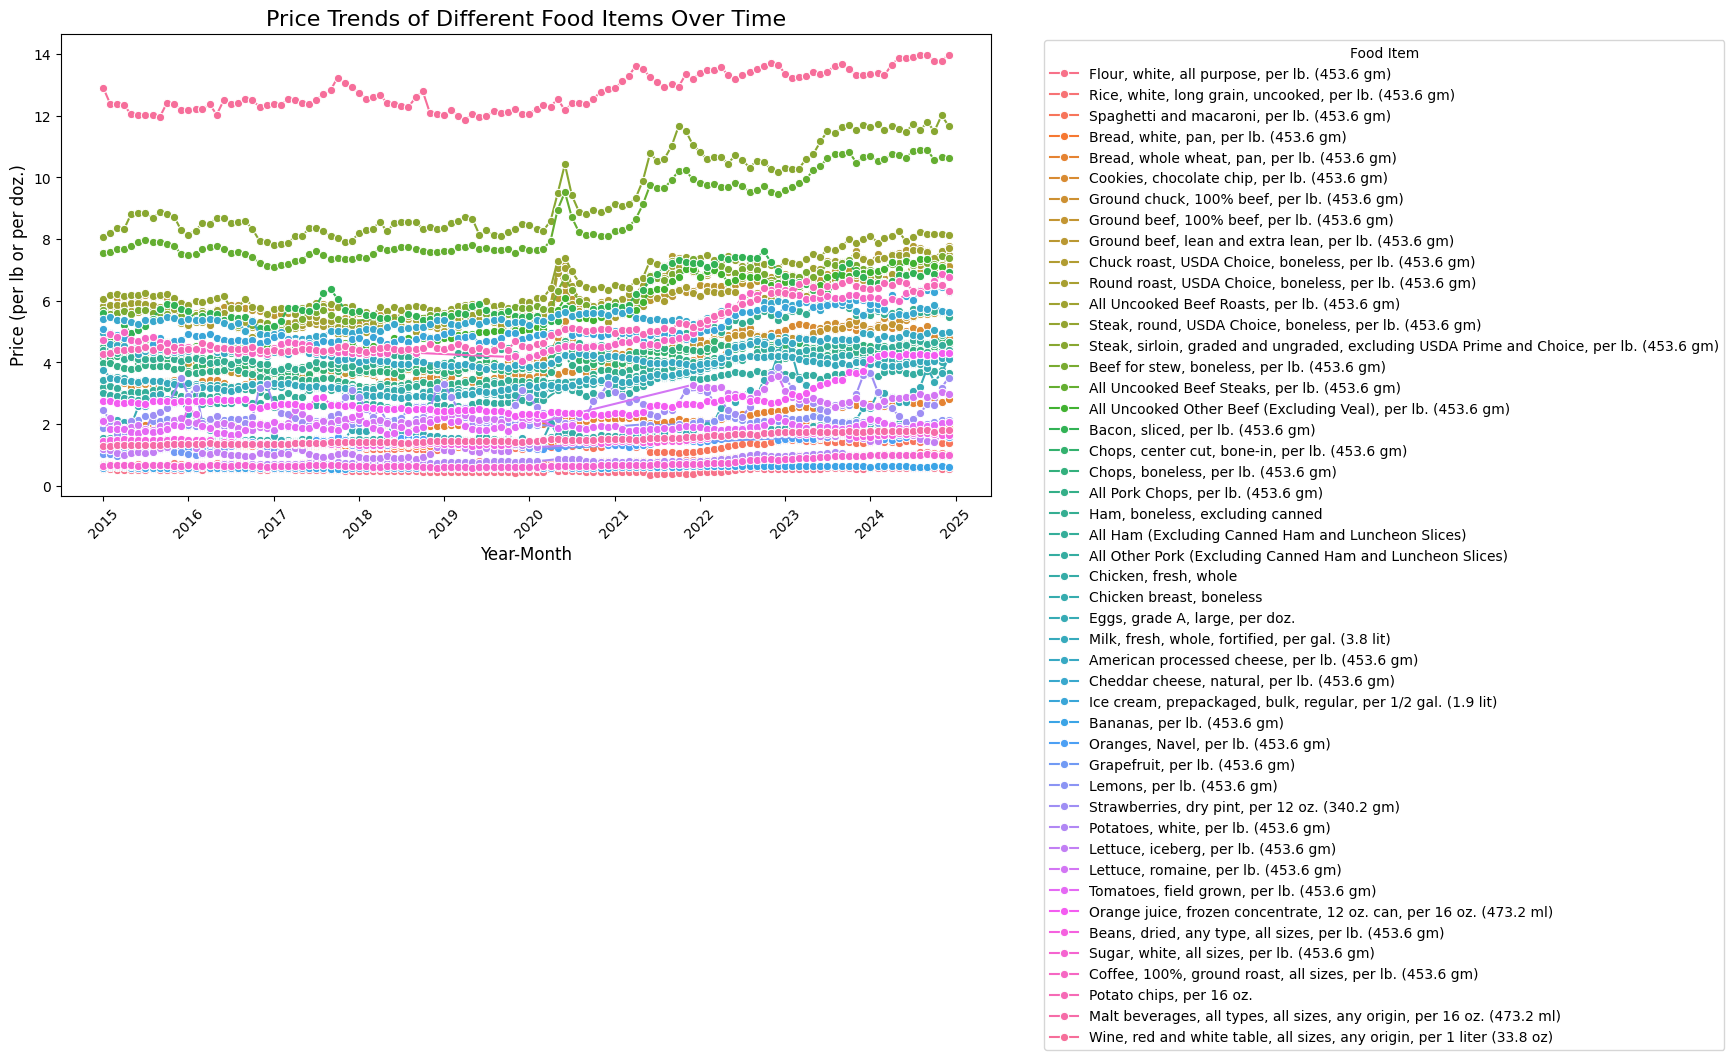

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_combined, x='year_month', y='value', hue='item_name', marker='o')

# Improve readability
plt.title('Price Trends of Different Food Items Over Time', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Price (per lb or per doz.)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Food Item', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

<ipython-input-42-1ee926331710>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_change_sorted, x='item_name', y='percent_change', palette='coolwarm')
<ipython-input-42-1ee926331710>:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


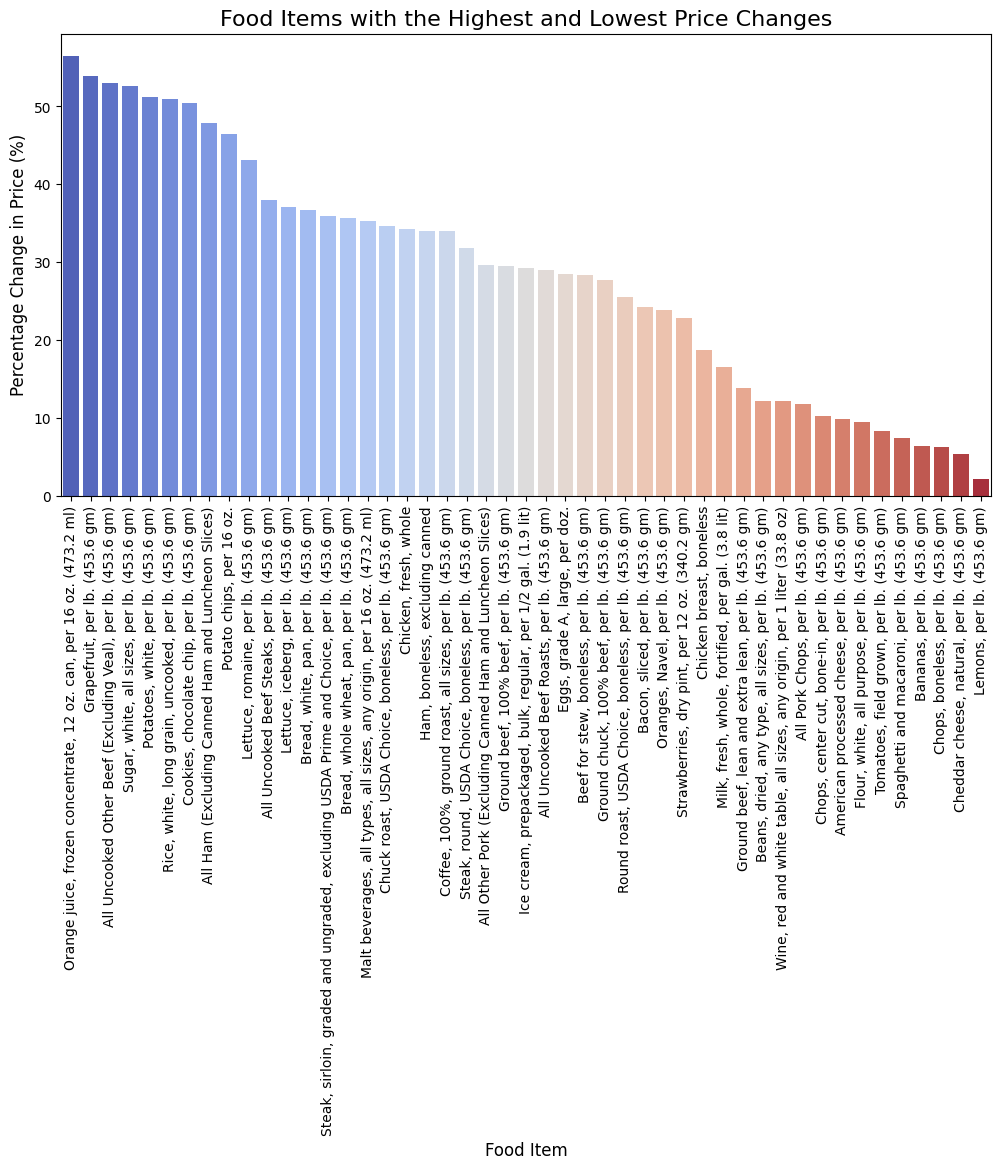

In [ ]:
# Calculate percentage change in price for each product
df_combined['year'] = df_combined['year_month'].dt.year
df_first_last_year = df_combined.groupby(['item_name', 'year']).agg({'value': 'mean'}).reset_index()

# Get the first and last year for each item
first_year_prices = df_first_last_year.groupby('item_name').first().reset_index()
last_year_prices = df_first_last_year.groupby('item_name').last().reset_index()

# Merge the first and last year prices to calculate the percentage change
price_change = pd.merge(first_year_prices, last_year_prices, on='item_name', suffixes=('_first', '_last'))
price_change['percent_change'] = ((price_change['value_last'] - price_change['value_first']) / price_change['value_first']) * 100

# Sort by price change (ascending/descending)
price_change_sorted = price_change.sort_values(by='percent_change', ascending=False)

# Plot the bar chart for the highest and lowest price changes
plt.figure(figsize=(12, 6))
sns.barplot(data=price_change_sorted, x='item_name', y='percent_change', palette='coolwarm')
plt.title('Food Items with the Highest and Lowest Price Changes', fontsize=16)
plt.xlabel('Food Item', fontsize=12)
plt.ylabel('Percentage Change in Price (%)', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

<ipython-input-43-313f1cee3518>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_stability_sorted, x='item_name', y='value', palette='Blues')
<ipython-input-43-313f1cee3518>:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


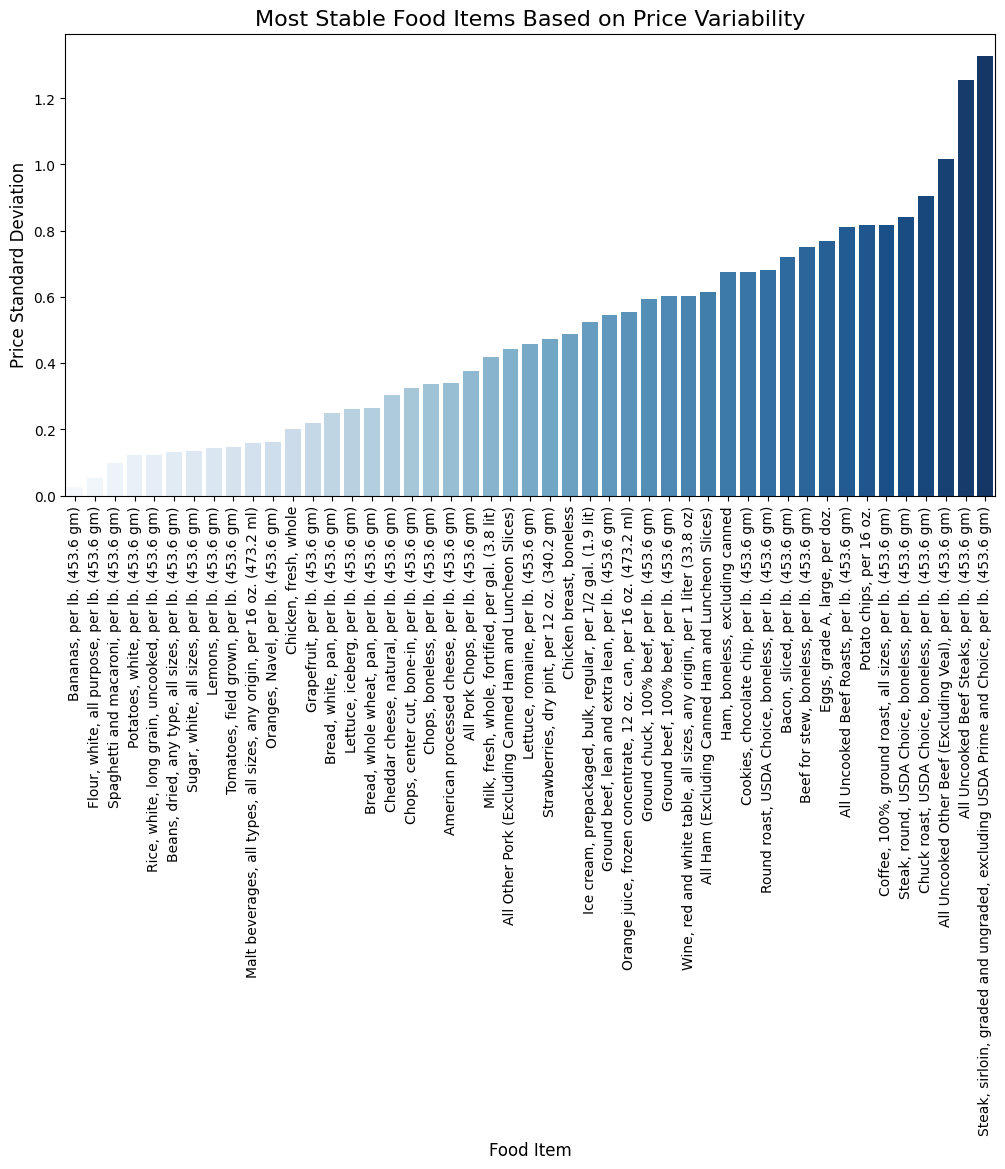

In [ ]:
# Calculate standard deviation of prices for each item
price_stability = df_combined.groupby('item_name')['value'].std().reset_index()

# Sort by standard deviation (lowest first)
price_stability_sorted = price_stability.sort_values(by='value', ascending=True)

# Plot the bar chart for the most stable products
plt.figure(figsize=(12, 6))
sns.barplot(data=price_stability_sorted, x='item_name', y='value', palette='Blues')
plt.title('Most Stable Food Items Based on Price Variability', fontsize=16)
plt.xlabel('Food Item', fontsize=12)
plt.ylabel('Price Standard Deviation', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

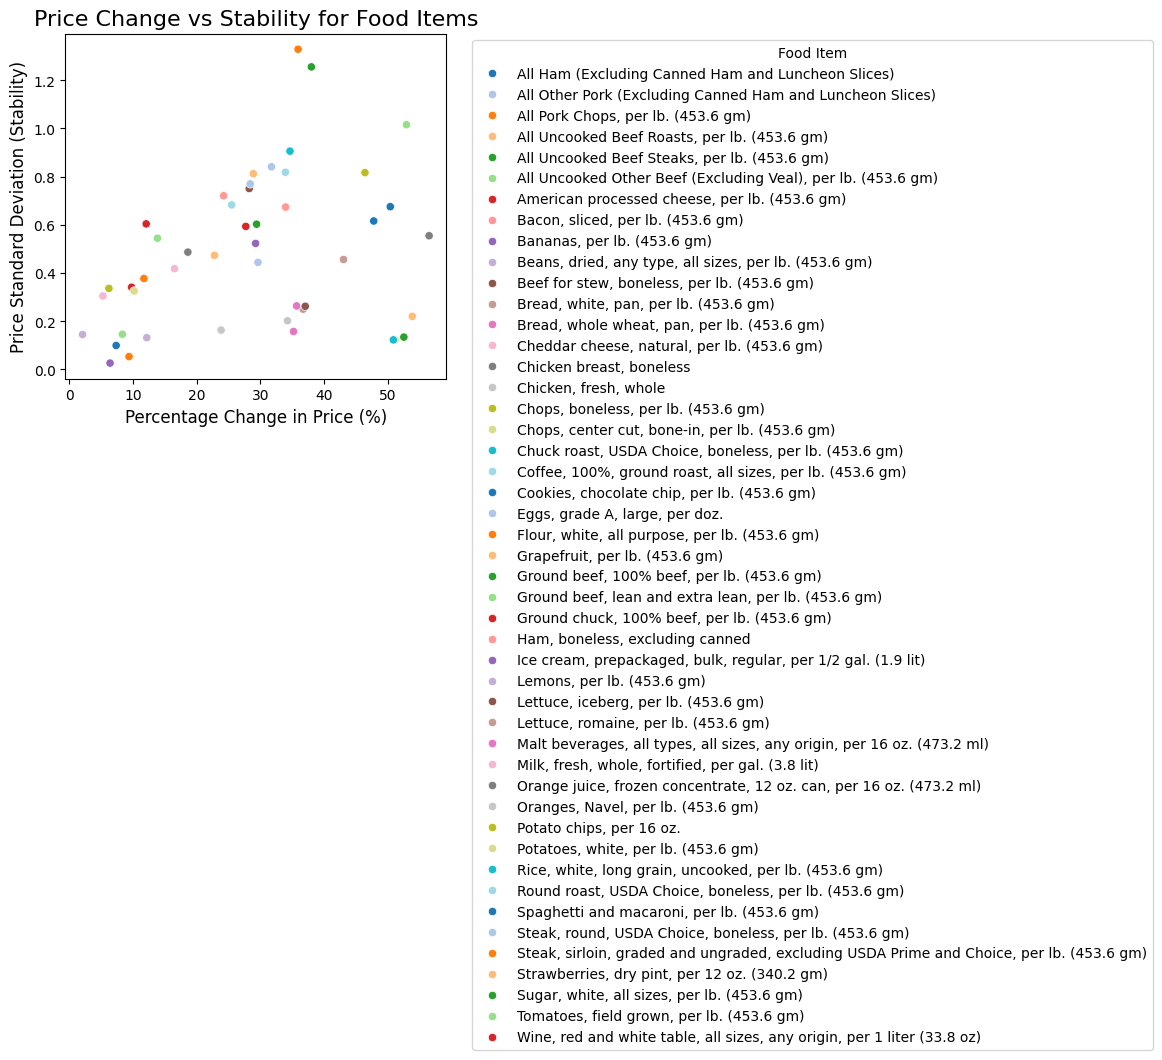

In [ ]:
# Merge price change and stability data
stability_change = pd.merge(price_change, price_stability, on='item_name')
stability_change = stability_change.rename(columns={'value': 'price_stability'})

# Scatter plot: price change vs stability
plt.figure(figsize=(12, 8))
sns.scatterplot(data=stability_change, x='percent_change', y='price_stability', hue='item_name', palette='tab20')
plt.title('Price Change vs Stability for Food Items', fontsize=16)
plt.xlabel('Percentage Change in Price (%)', fontsize=12)
plt.ylabel('Price Standard Deviation (Stability)', fontsize=12)
plt.legend(title='Food Item', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()